# WeatherPy

In [24]:
# Dependencies and Setup
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

641


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
* I found response code to be more usefull then just a number to print.

In [6]:
city_weather_df=pd.DataFrame(columns =['City','Latitude','Longitude','Temperature (F)','Humidity (%)',
                                       'Cloudiness','Wind Speed (MPH)','Country','Date'])
for i in cities:
    time.sleep(0.2)
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = i
    query_url = url + "appid=" + weather_api_key + "&q=" + i  + '&units=imperial'
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(i,weather_response)
    if (weather_response.status_code == 200) and (weather_json['main']['humidity'] < 101):
        new_row = {'City':i,
               'Latitude': weather_json['coord']['lat'],
               'Longitude': weather_json['coord']['lon'],
               'Temperature (F)': weather_json['main']['temp_max'],
               'Humidity (%)': weather_json['main']['humidity'],
               'Cloudiness': weather_json['clouds']['all'],
               'Wind Speed (MPH)': weather_json['wind']['speed'],
               'Country': weather_json['sys']['country'],
               'Date': weather_json['dt']}
        city_weather_df = city_weather_df.append(new_row, ignore_index=True)

nikolskoye <Response [200]>
saleaula <Response [404]>
chitipa <Response [200]>
placido de castro <Response [200]>
naze <Response [200]>
kota bahru <Response [200]>
srednekolymsk <Response [200]>
lebu <Response [200]>
cape town <Response [200]>
busselton <Response [200]>
yellowknife <Response [200]>
waitati <Response [200]>
bukan <Response [200]>
barentsburg <Response [404]>
itoman <Response [200]>
saldanha <Response [200]>
ushuaia <Response [200]>
zabaykalsk <Response [200]>
saint-philippe <Response [200]>
saleilua <Response [404]>
atuona <Response [200]>
lucapa <Response [200]>
upernavik <Response [200]>
kapaa <Response [200]>
castro <Response [200]>
nantucket <Response [200]>
tuktoyaktuk <Response [200]>
albany <Response [200]>
emerald <Response [200]>
punta arenas <Response [200]>
ribeira grande <Response [200]>
cairns <Response [200]>
humberto de campos <Response [200]>
butaritari <Response [200]>
atlantic city <Response [200]>
port lincoln <Response [200]>
save <Response [200]>
ra

sechura <Response [200]>
grindavik <Response [200]>
bafq <Response [200]>
virginia beach <Response [200]>
kachikau <Response [404]>
cheuskiny <Response [404]>
kahului <Response [200]>
dali <Response [200]>
grand river south east <Response [404]>
fallon <Response [200]>
port hedland <Response [200]>
opuwo <Response [200]>
bargi <Response [200]>
chatellerault <Response [200]>
kidal <Response [200]>
cocorit <Response [200]>
mahaicony <Response [404]>
dolores <Response [200]>
altus <Response [200]>
novoyegoryevskoye <Response [404]>
pontes e lacerda <Response [200]>
molchanovo <Response [200]>
mahebourg <Response [200]>
numata <Response [200]>
tuatapere <Response [200]>
gamba <Response [200]>
sao filipe <Response [200]>
bethel <Response [200]>
tsihombe <Response [404]>
soller <Response [200]>
harper <Response [200]>
vicuna <Response [200]>
saskylakh <Response [200]>
longyearbyen <Response [200]>
boke <Response [200]>
batagay-alyta <Response [200]>
portland <Response [200]>
papara <Response

marzuq <Response [200]>
wamba <Response [200]>
conde <Response [200]>
ginda <Response [200]>
bayan <Response [200]>
santa marta <Response [200]>
basqal <Response [200]>
maragogi <Response [200]>
acapulco <Response [200]>
san matias <Response [200]>
bubaque <Response [200]>
mattoon <Response [200]>
talcahuano <Response [200]>
samalaeulu <Response [404]>
bandarbeyla <Response [200]>
mandali <Response [200]>


# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather_df.to_csv(r'cities.csv', index = False)
city_weather_df   

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness,Wind Speed (MPH),Country,Date
0,nikolskoye,59.7035,30.7861,10.99,79,75,13.42,RU,1612630830
1,chitipa,-9.7024,33.2697,68.04,91,99,2.53,MW,1612630831
2,placido de castro,-10.3353,-67.1856,77.76,82,99,2.98,BR,1612630831
3,naze,28.3667,129.4833,61.47,82,98,7.16,JP,1612630832
4,kota bahru,6.1333,102.2386,77.00,83,20,5.75,MY,1612630832
...,...,...,...,...,...,...,...,...,...
580,bubaque,11.2833,-15.8333,79.63,59,23,16.37,GW,1612631036
581,mattoon,39.4831,-88.3728,25.00,58,1,5.75,US,1612631036
582,talcahuano,-36.7167,-73.1167,60.80,82,90,4.61,CL,1612630789
583,bandarbeyla,9.4942,50.8122,76.93,78,15,13.29,SO,1612631037


## Inspect the data and remove the cities where the humidity > 100%.
* Skip this step if there are no cities that have humidity > 100%. 

* See above - >100% humidity didn't even make it to the df to begin with

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

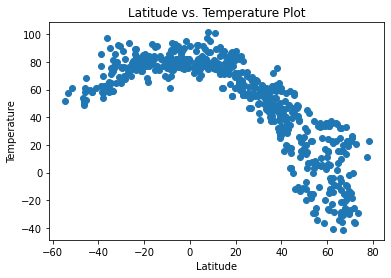

In [11]:
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.scatter(city_weather_df['Latitude'], city_weather_df['Temperature (F)'])

## Latitude vs. Humidity Plot

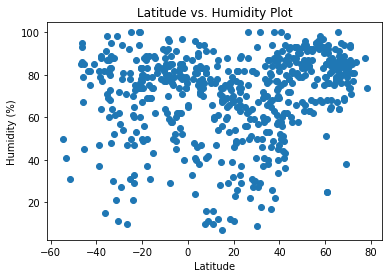

In [13]:
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity (%)'])

## Latitude vs. Cloudiness Plot

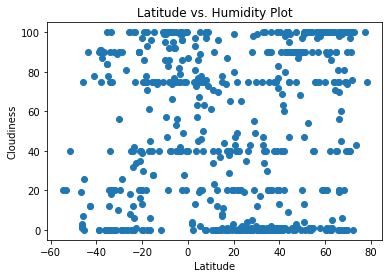

In [14]:
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness'])

## Latitude vs. Wind Speed Plot

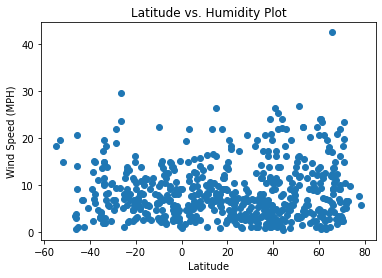

In [15]:
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed (MPH)'])

## Linear Regression

In [46]:
north_weather_df = city_weather_df[city_weather_df['Latitude'] >= 0]
south_weather_df = city_weather_df[city_weather_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: -0.8710561124243995
y = -1.49x + 97.18


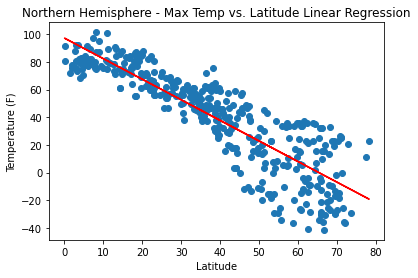

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Latitude'], north_weather_df['Temperature (F)'])
print('r-value:',rvalue)
regress_values = north_weather_df['Latitude'] * slope + intercept
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_weather_df['Latitude'], north_weather_df['Temperature (F)'])
plt.plot(north_weather_df['Latitude'],regress_values,"r-")
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.6175968340897757
y = 0.46x + 86.04


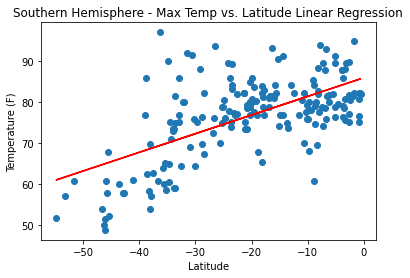

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Latitude'], south_weather_df['Temperature (F)'])
print('r-value:',rvalue)
regress_values = south_weather_df['Latitude'] * slope + intercept
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_weather_df['Latitude'], south_weather_df['Temperature (F)'])
plt.plot(south_weather_df['Latitude'],regress_values,"r-")
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.3742359221263578
y = 0.38x + 55.55


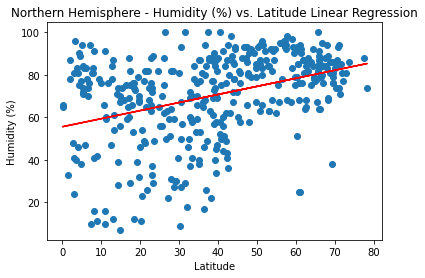

In [58]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Latitude'], north_weather_df['Humidity (%)'].astype(int))
print('r-value:',rvalue)
regress_values = north_weather_df['Latitude'] * slope + intercept
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_weather_df['Latitude'], north_weather_df['Humidity (%)'])
plt.plot(north_weather_df['Latitude'],regress_values,"r-")
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.10242909848809117
y = 0.15x + 74.49


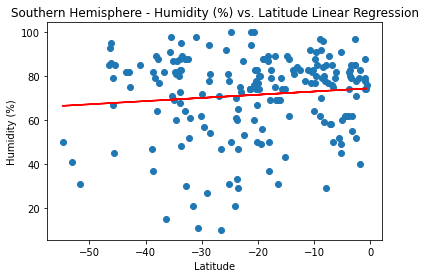

In [59]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Latitude'], south_weather_df['Humidity (%)'].astype(int))
print('r-value:',rvalue)
regress_values = south_weather_df['Latitude'] * slope + intercept
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_weather_df['Latitude'], south_weather_df['Humidity (%)'])
plt.plot(south_weather_df['Latitude'],regress_values,"r-")
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.225821000524825
y = 0.44x + 29.21


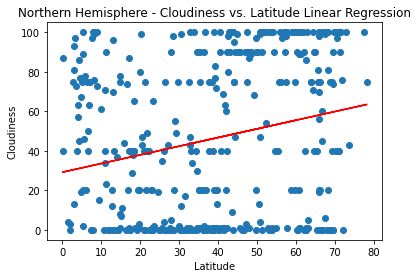

In [60]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Latitude'], north_weather_df['Cloudiness'].astype(int))
print('r-value:',rvalue)
regress_values = north_weather_df['Latitude'] * slope + intercept
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_weather_df['Latitude'], north_weather_df['Cloudiness'])
plt.plot(north_weather_df['Latitude'],regress_values,"r-")
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.390243146383644
y = 1.08x + 77.15


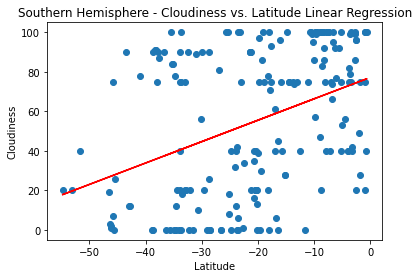

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Latitude'], south_weather_df['Cloudiness'].astype(int))
print('r-value:',rvalue)
regress_values = south_weather_df['Latitude'] * slope + intercept
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_weather_df['Latitude'], south_weather_df['Cloudiness'])
plt.plot(south_weather_df['Latitude'],regress_values,"r-")
print(line_eq)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.08459288750527037
y = 0.03x + 7.63


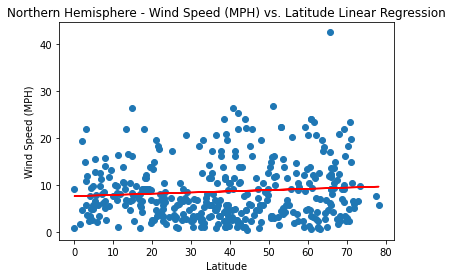

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Latitude'], north_weather_df['Wind Speed (MPH)'])
print('r-value:',rvalue)
regress_values = north_weather_df['Latitude'] * slope + intercept
plt.title('Northern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_weather_df['Latitude'], north_weather_df['Wind Speed (MPH)'])
plt.plot(north_weather_df['Latitude'],regress_values,"r-")
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: -0.13915945210383898
y = -0.05x + 6.94


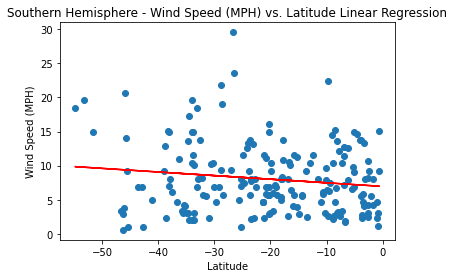

In [50]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Latitude'], south_weather_df['Wind Speed (MPH)'])
print('r-value:',rvalue)
regress_values = south_weather_df['Latitude'] * slope + intercept
plt.title('Southern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_weather_df['Latitude'], south_weather_df['Wind Speed (MPH)'])
plt.plot(south_weather_df['Latitude'],regress_values,"r-")
print(line_eq)